In [205]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [206]:
# Load the Excel file
dataFolder = "Dian_Li_CSC"
# join the current working directory with the folder name
folder_path = os.path.join(os.getcwd(), dataFolder)
filename0 = 'CSC_Au_PEDOT_180_Sample2'  # Replace with your file path; !!
filename = filename0 + '.xlsx'
file_path = os.path.join(folder_path, filename)
sheet_name = 'Sheet1'  # Replace with your sheet name

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract a column to a list
column_name1 = 'Potential (V)'  # Replace with your column name
potential_data = df[column_name1].tolist()
column_name2 = 'Current (A)'  # Replace with your column name
current_data = df[column_name2].tolist()

#print(len(column_data))

In [207]:
# data processing 1
# Compartmentalize the original data lists accroading to the potential cycle and stored in VCycle and ACycle
# Initialize
VCycle = []
ACycle = []

monotony = 0
left = 0

for right, Voltage in enumerate(potential_data):
    if right+1 == len(potential_data):
        VCycle.append(potential_data[left:])
        ACycle.append(current_data[left:])
    elif potential_data[right+1]>Voltage:
        # the scanned voltage starts to rise
        monotony = 1
    elif potential_data[right+1]<Voltage and monotony==1:
        # the scanned voltage starts to drop and enter to the next cycle
        VCycle.append(potential_data[left:right+1])
        ACycle.append(current_data[left:right+1])
        
        # update
        monotony = 0
        left = right+1

#len(VCycle[0])
#len(ACycle[0])

In [208]:
# data processing 2
# smoothing - Moving Average with window size of 10
CycleNum = 3 #!!; set the cycle index
VCycleData = VCycle[CycleNum-1]
ACycleData = ACycle[CycleNum-1]

# Function to calculate moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Smooth the data
window_size = 10  # Size of the moving average window
ACycleDataSmooth = moving_average(ACycleData, window_size)

# Adjust x for the reduced size after convolution
VCycleDataSmooth = VCycleData[:len(ACycleDataSmooth)]

In [210]:
# data storage interface for ploting formal CV plot
ACycleDataSmooth3 = ACycleDataSmooth
VCycleDataSmooth3 = VCycleDataSmooth
newACycleDataSmooth3 = [x * factor for x in ACycleDataSmooth3]




In [143]:
# unit conversion for current from A to nA
factor = 1e9
newACycleDataSmooth0 = [x * factor for x in ACycleDataSmooth0]
newACycleDataSmooth1 = [x * factor for x in ACycleDataSmooth1]
newACycleDataSmooth2 = [x * factor for x in ACycleDataSmooth2]
newACycleDataSmooth3 = [x * factor for x in ACycleDataSmooth3]
newACycleDataSmooth4 = [x * factor for x in ACycleDataSmooth4]




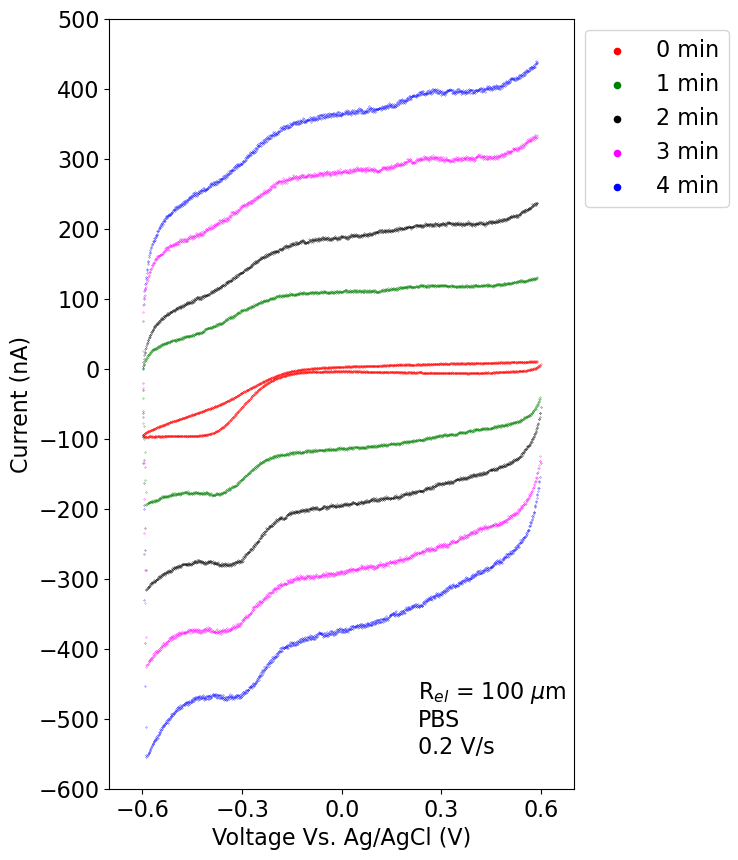

In [185]:
# ploting formal CV plot
# Set the size of the figure
plt.figure(figsize=(6, 10))  # 10 inches wide by 6 inches tall

# Create a scatter plot
dotsize = 0.05
plt.scatter(VCycleDataSmooth0, newACycleDataSmooth0, s=dotsize, label='0 min', color='red')
plt.scatter(VCycleDataSmooth1, newACycleDataSmooth1, s=dotsize, label='1 min', color='green')
plt.scatter(VCycleDataSmooth2, newACycleDataSmooth2, s=dotsize, label='2 min', color='black')
plt.scatter(VCycleDataSmooth3, newACycleDataSmooth3, s=dotsize, label='3 min', color='magenta')
plt.scatter(VCycleDataSmooth4, newACycleDataSmooth4, s=dotsize, label='4 min', color='blue')

# Adding title and labels
#plt.title('Cyclic Voltammetry for Au/PEDOT:PSS Exmaple c3') #!!
plt.xlabel('Voltage Vs. Ag/AgCl (V)', fontsize=16)
plt.ylabel('Current (nA)', fontsize=16)
# Setting the axis range
plt.xlim(-0.7, 0.7)  # Set x-axis range from 0 to 6; !!
plt.ylim(-6e2, 5e2) # Set y-axis range from 0 to 30; !!

# Setting x-axis and y-axis ticks
plt.xticks([-0.6, -0.3, 0, 0.3, 0.6])
plt.yticks([-600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500])
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)

# Adding a red dashed line parallel to the x-axis
y_value_for_line = 0  # Choose the y value where the line should be drawn
#plt.axhline(y=y_value_for_line, color='red', linestyle='--')

# Adding small text at a specific location
x_text1 = -0.44   # x-coordinate for the text, !!
y_text1 = -2e-7  # y-coordinate for the text, !!
#plt.text(x_text1, y_text1, 'CSC$_{(c)}$', fontsize=10, color='red', weight='bold')

# Adding small text at a specific location
x_text1 = 0.23   # x-coordinate for the text, !!
y_text1 = 1e-7  # y-coordinate for the text, !!
#plt.text(x_text1, y_text1, 'CSC$_{(a)}$', fontsize=10, color='red', weight='bold')

# Adding small text at a specific location
x_text1 = 0.23   # x-coordinate for the text, !!
y_text1 = -550  # y-coordinate for the text, !!
plt.text(x_text1, y_text1, 'R$_{el}$ = 100 $\mu$m\nPBS\n0.2 V/s', fontsize=16, color='black')

# Showing the legend
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1), markerscale=20)

# save the plot
figname = 'final CSC' + '.png'
fig_path = os.path.join(folder_path, figname)
plt.savefig(fig_path, dpi=300, bbox_inches='tight')  # Saves the figure in PNG format with 300 dpi

# Show the plot
plt.show()

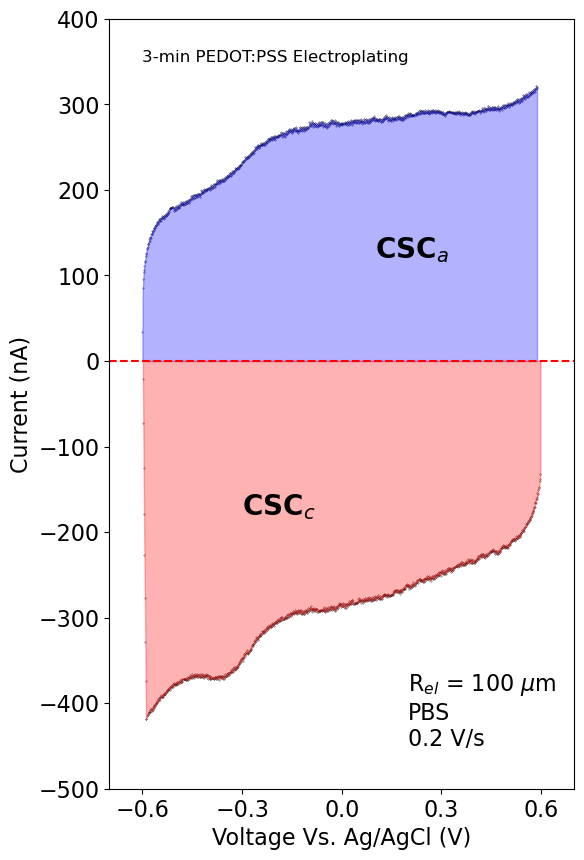

In [224]:
# ploting formal example CV plot for CSC calculation (using 'CSC_Au_PEDOT_180_Sample2')
# Set the size of the figure
plt.figure(figsize=(6, 10))  # 10 inches wide by 6 inches tall

# Create a scatter plot
dotsize = 0.05
plt.scatter(VCycleDataSmooth3, newACycleDataSmooth3, s=dotsize, label='3 min', color='black')
plt.fill_between(VCycleDataSmooth3, newACycleDataSmooth3, where=(ACycleDataSmooth > 0), color='blue', alpha=0.3)  # 'alpha' controls the transparency
plt.fill_between(VCycleDataSmooth3, newACycleDataSmooth3, where=(ACycleDataSmooth < 0), color='red', alpha=0.3)  # 'alpha' controls the transparency

# Adding title and labels
#plt.title('Cyclic Voltammetry for Au/PEDOT:PSS Exmaple c3') #!!
plt.xlabel('Voltage Vs. Ag/AgCl (V)', fontsize=16)
plt.ylabel('Current (nA)', fontsize=16)
# Setting the axis range
plt.xlim(-0.7, 0.7)  # Set x-axis range from 0 to 6; !!
plt.ylim(-5e2, 4e2) # Set y-axis range from 0 to 30; !!

# Setting x-axis and y-axis ticks
plt.xticks([-0.6, -0.3, 0, 0.3, 0.6])
plt.yticks([-500, -400, -300, -200, -100, 0, 100, 200, 300, 400])
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)

# Adding a red dashed line parallel to the x-axis
y_value_for_line = 0  # Choose the y value where the line should be drawn
plt.axhline(y=y_value_for_line, color='red', linestyle='--')

# Adding small text at a specific location
x_text1 = -0.3   # x-coordinate for the text, !!
y_text1 = -180  # y-coordinate for the text, !!
plt.text(x_text1, y_text1, 'CSC$_{c}$', fontsize=20, color='black', weight='bold')

# Adding small text at a specific location
x_text1 = 0.1   # x-coordinate for the text, !!
y_text1 = 120  # y-coordinate for the text, !!
plt.text(x_text1, y_text1, 'CSC$_{a}$', fontsize=20, color='black', weight='bold')

# Adding small text at a specific location
x_text1 = 0.2   # x-coordinate for the text, !!
y_text1 = -450  # y-coordinate for the text, !!
plt.text(x_text1, y_text1, 'R$_{el}$ = 100 $\mu$m\nPBS\n0.2 V/s', fontsize=16, color='black')

# Adding small text at a specific location
x_text1 = -0.6   # x-coordinate for the text, !!
y_text1 = 350  # y-coordinate for the text, !!
plt.text(x_text1, y_text1, '3-min PEDOT:PSS Electroplating', fontsize=12, color='black')

# Showing the legend
#plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(1, 1), markerscale=20)

# save the plot
figname = 'final CSC calculate example' + '.png'
fig_path = os.path.join(folder_path, figname)
plt.savefig(fig_path, dpi=300, bbox_inches='tight')  # Saves the figure in PNG format with 300 dpi

# Show the plot
plt.show()

In [ ]:
'''


plt.fill_between(VCycleDataSmooth, ACycleDataSmooth, where=(ACycleDataSmooth > 0), color='lightcoral', alpha=0.5)  # 'alpha' controls the transparency
plt.fill_between(VCycleDataSmooth, ACycleDataSmooth, where=(ACycleDataSmooth < 0), color='blue', alpha=0.5)  # 'alpha' controls the transparency

'''

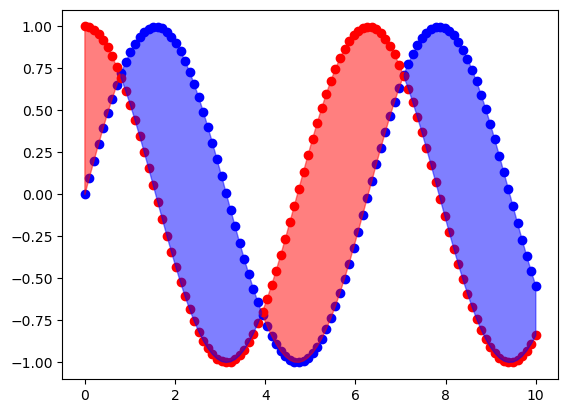

In [194]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)  # First curve
y2 = np.cos(x)  # Second curve

# Scatter plot
plt.scatter(x, y1, color='blue')
plt.scatter(x, y2, color='red')

# Fill area between the curves
plt.fill_between(x, y1, y2, where=(y1 > y2), color='blue', alpha=0.5, interpolate=True)
plt.fill_between(x, y1, y2, where=(y1 <= y2), color='red', alpha=0.5, interpolate=True)

# Show the plot
plt.show()


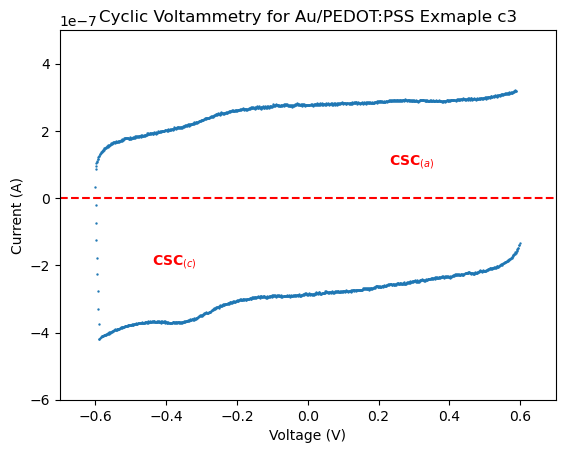

In [191]:
# Create a scatter plot
plt.scatter(VCycleDataSmooth, ACycleDataSmooth, s=0.5)

# Adding title and labels
plt.title('Cyclic Voltammetry for Au/PEDOT:PSS Exmaple c3') #!!
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
# Setting the axis range
plt.xlim(-0.7, 0.7)  # Set x-axis range from 0 to 6; !!
plt.ylim(-6e-7, 5e-7) # Set y-axis range from 0 to 30; !!

# Adding a red dashed line parallel to the x-axis
y_value_for_line = 0  # Choose the y value where the line should be drawn
plt.axhline(y=y_value_for_line, color='red', linestyle='--')

# Adding small text at a specific location
x_text1 = -0.44   # x-coordinate for the text, !!
y_text1 = -2e-7  # y-coordinate for the text, !!
plt.text(x_text1, y_text1, 'CSC$_{(c)}$', fontsize=10, color='red', weight='bold')

# Adding small text at a specific location
x_text1 = 0.23   # x-coordinate for the text, !!
y_text1 = 1e-7  # y-coordinate for the text, !!
plt.text(x_text1, y_text1, 'CSC$_{(a)}$', fontsize=10, color='red', weight='bold')

# save the plot
figname = filename0 + '.png'
fig_path = os.path.join(folder_path, figname)
plt.savefig(fig_path, dpi=300)  # Saves the figure in PNG format with 300 dpi

# Show the plot
plt.show()

In [67]:
####################### For "CSC_Au_PEDOT_60_Sample1" #######################
####################### For "CSC_Au_PEDOT_60_Sample2" #######################
####################### For "CSC_Au_PEDOT_60_Sample3" #######################
####################### For "CSC_Au_PEDOT_60_Sample4" #######################
####################### For "CSC_Au_PEDOT_180_Sample1" #######################
for index, Voltage in enumerate(VCycleDataSmooth):
    if Voltage < VCycleDataSmooth[index+1]:
        i2 = index
        break


revlist = ACycleDataSmooth[::-1]
for index, Current in enumerate(revlist):
    if Current > 0 and revlist[index+1] < 0:
        i3 = len(ACycleDataSmooth)-(index+1)-1
        break

print(i2)
print(i3)

VCycleDataSmooth_1 = VCycleDataSmooth[0:i2+1]
VCycleDataSmooth_2 = VCycleDataSmooth[i2+1:i3+1]
VCycleDataSmooth_3 = VCycleDataSmooth[i3+1:]
ACycleDataSmooth_1 = ACycleDataSmooth[0:i2+1]
ACycleDataSmooth_2 = ACycleDataSmooth[i2+1:i3+1]
ACycleDataSmooth_3 = ACycleDataSmooth[i3+1:]

# Calculate the integral to get area above or below 0 using the trapezoidal rule.
integral_1 = -np.trapz(ACycleDataSmooth_1, VCycleDataSmooth_1) # Note: reversed x
integral_2 = np.trapz(ACycleDataSmooth_2, VCycleDataSmooth_2)
integral_3 = np.trapz(ACycleDataSmooth_3, VCycleDataSmooth_3)

# params
Ael = 3.1416e-4 # cm^2
scan_rate = 0.2 # V/s

# Calculation of the charge storage capacity (CSC) for cathode (CSC_c)
# and anode (CSC_a) respectively
# unit: mC/cm^2
CSC_a = (integral_2 - integral_1)/Ael/scan_rate*1e3
CSC_c = integral_3/Ael/scan_rate*1e3
print(CSC_a)
print(CSC_c)

# save data in txt file
header = ["CSC_a", "CSC_c"]
data = [CSC_a, CSC_c]
# Open a file for writing
txtname = filename0 + '.txt'
txt_path = os.path.join(folder_path, txtname)
with open(txt_path, 'w') as file:
    # Write the header
    file.write('\t\t\t\t'.join(header) + '\n')
    # Write the data
    for num in data:
        # Write each number followed by a tab character
        file.write(f"{num}\t")
    # Optionally: write a newline at the end of the file
    file.write("\n")

984
989
5.070231147755643
4.386543571955637


In [192]:
####################### For "CSC_Au_PEDOT_Sample3" #######################
####################### For "CSC_Au_PEDOT_Sample4" #######################
####################### For "CSC_Au_PEDOT_120_Sample2" #######################
####################### For "CSC_Au_PEDOT_120_Sample3" #######################
####################### For "CSC_Au_PEDOT_180_Sample2" #######################
for index, Voltage in enumerate(VCycleDataSmooth):
    if Voltage < VCycleDataSmooth[index+1]:
        i2 = index
        break


revlist = ACycleDataSmooth[::-1]
for index, Current in enumerate(revlist):
    if Current > 0 and revlist[index+1] < 0:
        i3 = len(ACycleDataSmooth)-(index+1)-1
        break

print(i2)
print(i3)

VCycleDataSmooth_1 = VCycleDataSmooth[0:i3+1]
VCycleDataSmooth_2 = VCycleDataSmooth[i3+1:]
ACycleDataSmooth_1 = ACycleDataSmooth[0:i3+1]
ACycleDataSmooth_2 = ACycleDataSmooth[i3+1:]

# Calculate the integral to get area above or below 0 using the trapezoidal rule.
integral_1 = -np.trapz(ACycleDataSmooth_1, VCycleDataSmooth_1) # Note: reversed x
integral_2 = np.trapz(ACycleDataSmooth_2, VCycleDataSmooth_2)

# params
Ael = 3.1416e-4 # cm^2
scan_rate = 0.2 # V/s

# Calculation of the charge storage capacity (CSC) for cathode (CSC_c)
# and anode (CSC_a) respectively
# unit: mC/cm^2
CSC_a = -integral_1/Ael/scan_rate*1e3
CSC_c = integral_2/Ael/scan_rate*1e3
print(CSC_a)
print(CSC_c)

# save data in txt file
header = ["CSC_a", "CSC_c"]
data = [CSC_a, CSC_c]
# Open a file for writing
txtname = filename0 + '.txt'
txt_path = os.path.join(folder_path, txtname)
with open(txt_path, 'w') as file:
    # Write the header
    file.write('\t\t\t\t'.join(header) + '\n')
    # Write the data
    for num in data:
        # Write each number followed by a tab character
        file.write(f"{num}\t")
    # Optionally: write a newline at the end of the file
    file.write("\n")

986
985
5.536837167647893
4.876555616245826


In [39]:
####################### For "CSC_Au_Sample1" #######################
####################### For "CSC_Au_Sample2" #######################
####################### For "CSC_Au_Sample3" #######################
####################### For "CSC_Au_Sample4" #######################
####################### For "CSC_Au_PEDOT_120_Sample1" #######################
# Calculation of CSC for cathode and anode
# Aassume the area of curves around the y-axis (current = 0) is very small.
# First, divide the VCycleDataSmooth into increasing, decreasing part (with respect to voltage)
# and +/- part (with respect to current).
for index, Voltage in enumerate(VCycleDataSmooth):
    if Voltage < VCycleDataSmooth[index+1]:
        i2 = index
        break

for index, Current in enumerate(ACycleDataSmooth):
    # Aassume the area of curves around the y-axis (current = 0) is very small.
    if Current > 0 and ACycleDataSmooth[index+1] < 0:
        i1 = index
        break

revlist = ACycleDataSmooth[::-1]
for index, Current in enumerate(revlist):
    if Current > 0 and revlist[index+1] < 0:
        i3 = len(ACycleDataSmooth)-(index+1)-1
        break

print(i1)
print(i2)
print(i3)

VCycleDataSmooth_1 = VCycleDataSmooth[0:i1+1]
VCycleDataSmooth_2 = VCycleDataSmooth[i1+1:i2+1]
VCycleDataSmooth_3 = VCycleDataSmooth[i2+1:i3+1]
VCycleDataSmooth_4 = VCycleDataSmooth[i3+1:]
ACycleDataSmooth_1 = ACycleDataSmooth[0:i1+1]
ACycleDataSmooth_2 = ACycleDataSmooth[i1+1:i2+1]
ACycleDataSmooth_3 = ACycleDataSmooth[i2+1:i3+1]
ACycleDataSmooth_4 = ACycleDataSmooth[i3+1:]

# Calculate the integral to get area above or below 0 using the trapezoidal rule.
integral_1 = -np.trapz(ACycleDataSmooth_1, VCycleDataSmooth_1) # Note: reversed x
integral_2 = -np.trapz(ACycleDataSmooth_2, VCycleDataSmooth_2) # Note: reversed x
integral_3 = np.trapz(ACycleDataSmooth_3, VCycleDataSmooth_3)
integral_4 = np.trapz(ACycleDataSmooth_4, VCycleDataSmooth_4)

# params
Ael = 3.1416e-4 # cm^2
scan_rate = 0.2 # V/s

# Calculation of the charge storage capacity (CSC) for cathode (CSC_c)
# and anode (CSC_a) respectively
# unit: mC/cm^2
CSC_a = (integral_4 - integral_1)/Ael/scan_rate*1e3
CSC_c = (integral_3 - integral_2)/Ael/scan_rate*1e3
print(CSC_a)
print(CSC_c)

# save data in txt file
header = ["CSC_a", "CSC_c"]
data = [CSC_a, CSC_c]
# Open a file for writing
txtname = filename0 + '.txt'
txt_path = os.path.join(folder_path, txtname)
with open(txt_path, 'w') as file:
    # Write the header
    file.write('\t\t\t\t'.join(header) + '\n')
    # Write the data
    for num in data:
        # Write each number followed by a tab character
        file.write(f"{num}\t")
    # Optionally: write a newline at the end of the file
    file.write("\n")

40
986
1432
0.14204916211962637
0.5597311113193101
